# Multipoles

The field of a single point charge is relatively simple — as far as three-dimensional vector fields go.  What happens as we put more charges together?

Let's use Python to find out.

In [15]:
# Import useful functions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.widgets import Slider

In [16]:
# Turn on interactive plots.
# %matplotlib notebook

# Turn off interactive plots.
%matplotlib inline

We can use the functions in the `visualizing-fields` notebook.

In [3]:
# Define functions to calculate and plot fields.
def coordinates(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    
    return X, Y, Z

def potential(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    V = q/R
    
    return V

def field(charge=1, location=(0,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    Ex = q*(X-x0)/R**3
    Ey = q*(Y-y0)/R**3
    Ez = q*(Z-z0)/R**3
    
    return Ex, Ey, Ez

def draw_field(x,y,z,u,v,w, stride=25):
    """
    Takes coordinate arrays x,y,z and vector field component
    arrays u,v,w and draws a quiver plot where all of the arrows
    have the same length.
    """
    # Create a quiver plot.
    # Use a coarser grid.
    x = X[::stride,::stride,::stride].copy()
    y = Y[::stride,::stride,::stride].copy()
    z = Z[::stride,::stride,::stride].copy()
    ex = Ex[::stride,::stride,::stride].copy()
    ey = Ey[::stride,::stride,::stride].copy()
    ez = Ez[::stride,::stride,::stride].copy()
    
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot(projection='3d')
    ax.quiver3D(x,y,z,ex,ey,ez, pivot='middle', length=0.7, normalize=True, linewidth=0.5, color='red')
    ax.set_title(r"$\vec{E}(\vec{R})$")

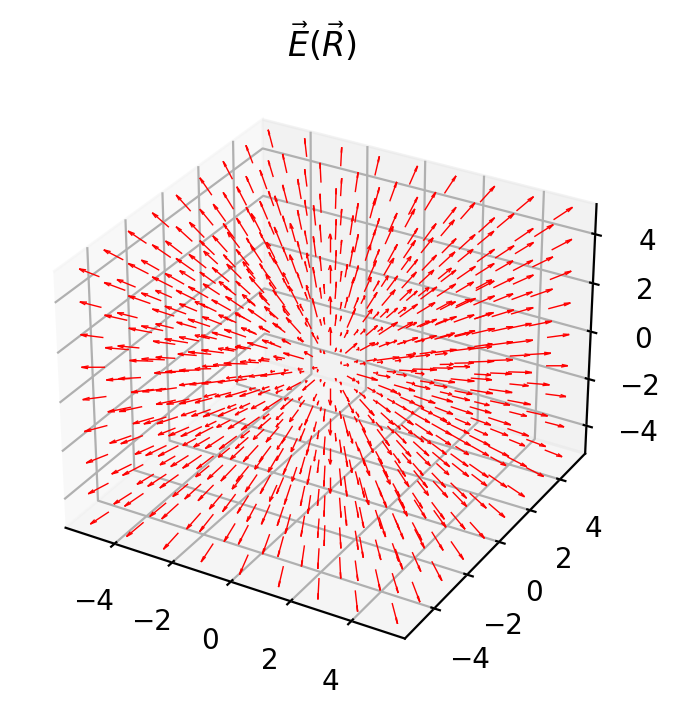

In [4]:
# Draw the field of a point charge at the origin for reference.
X,Y,Z = coordinates()
Ex, Ey, Ez = field()
draw_field(X,Y,Z, Ex,Ey,Ez)

The functions don't require any arguments, but you can supply them to change the behavior.  Let's look at the field of two point charges separated by "2 units".  (We'll talk about units later ...)

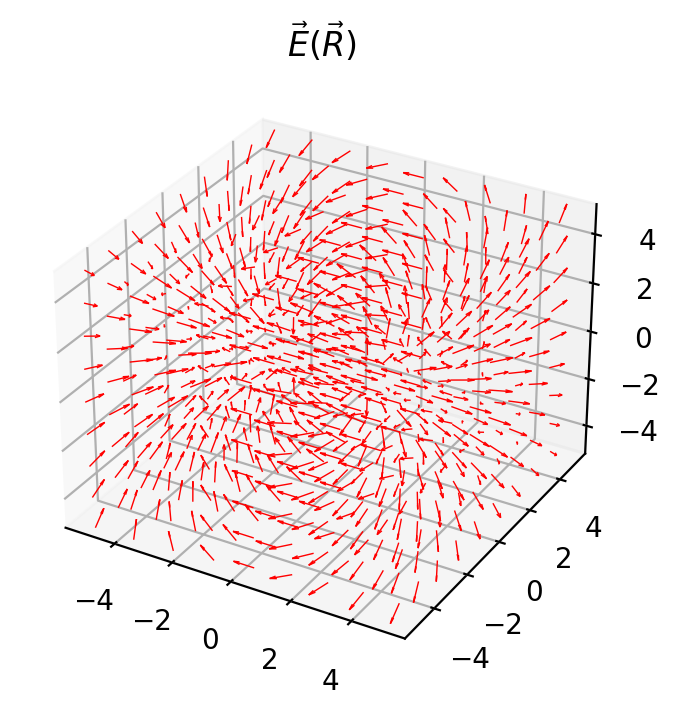

In [5]:
# Charge 1
q1 = +1
x1 = +1
y1 = 0
z1 = 0

# Charge 2
q2 = -1
x2 = -1
y2 = 0
z2 = 0

# Combute combined potential.
V1 = potential(q1, (x1,y1,z1))
V2 = potential(q2, (x2,y2,z2))

# Compute combined field.
E1 = np.stack(field(q1, (x1,y1,z1)))
E2 = np.stack(field(q2, (x2,y2,z2)))

Ex, Ey, Ez = E1 + E2

draw_field(X,Y,Z, Ex, Ey,Ez)

Describe the pattern.  How is it similar to what you observed with a single point charge?  Are there any significant difference?

The signifcant change between the point charge and several charges is that the two charges have interactions in the zone between the charges. It seems that the field lines point directly outwards from the area between the charges. Other than that, the field is similar to that of a single point charges when they get some distance away from the charge center. The vectors point almost directly outwards from the charges, which makes sense with Gauss's law.

Change the value of `q2` above to `-1` and replot.  What changes?  How is it similar to what you observed with a single point charge?  Are there any significant difference? 

This time, the plot appears to be curling around the two point charges. The field points outwards from the postive charge and makes its way back to the negative charge. There seems to be line which points through the center of the field one the line which contains the two charges. The vector field points in from one side and points out from the other, which is unlike the graph above which only points outward. It is similar to the previous graphs in that it is difficult to determine what is happening between the charges.

# Dipoles and Quadrupoles

A point charge creates a "monopole" field pattern.  The pattern you just observed is called a "dipole" field.  There are "quadrupoles" and "octupoles" and "hexadecapoles" ... and more.  The patterns can be difficult to interpret in three dimensions, so we will focus our attention on a 2D slice through the plane where the charges are located.

Let's look at the dipole again.

In [6]:
# Turn off interactive plotting for now.
%matplotlib inline

In [7]:
# Define functions to calculate and plot fields.
def coordinates_2d(charge=1, location=(0,0), box_size=5, grid_points=201, epsilon=1e-6):
    s = np.linspace(-box_size, box_size, grid_points)
    X,Y = np.meshgrid(s,s, indexing='ij')
    
    return X, Y

def potential_2d(charge=1, location=(0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y = np.meshgrid(s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + epsilon**2)
    V = q/R
    
    return V

def field_2d(charge=1, location=(0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y = np.meshgrid(s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + epsilon**2)
    Ex = q*(X-x0)/R**3
    Ey = q*(Y-y0)/R**3
    
    return Ex, Ey

def draw_field_2d(X,Y,U,V, stride=10):
    """
    Takes coordinate arrays x,y,z and vector field component
    arrays u,v,w and draws a quiver plot where all of the arrows
    have the same length.
    """
    # Create a quiver plot.
    # Use a coarser grid.
    x = X[::stride,::stride].copy()
    y = Y[::stride,::stride].copy()
    u = U[::stride,::stride].copy()
    v = V[::stride,::stride].copy()
    
    # Make all arrows the same length.
    w = np.sqrt(u**2 + v**2 + 1e-6)
    u /= w
    v /= w
    
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot()
    ax.quiver(x,y,u,v, pivot='middle', linewidth=0.5, color='green', minlength=1)
    ax.set_title(r"$\vec{E}(\vec{R})$")
    ax.axis('equal')

Let's look at the field of a point charge located at the origin in this representation.

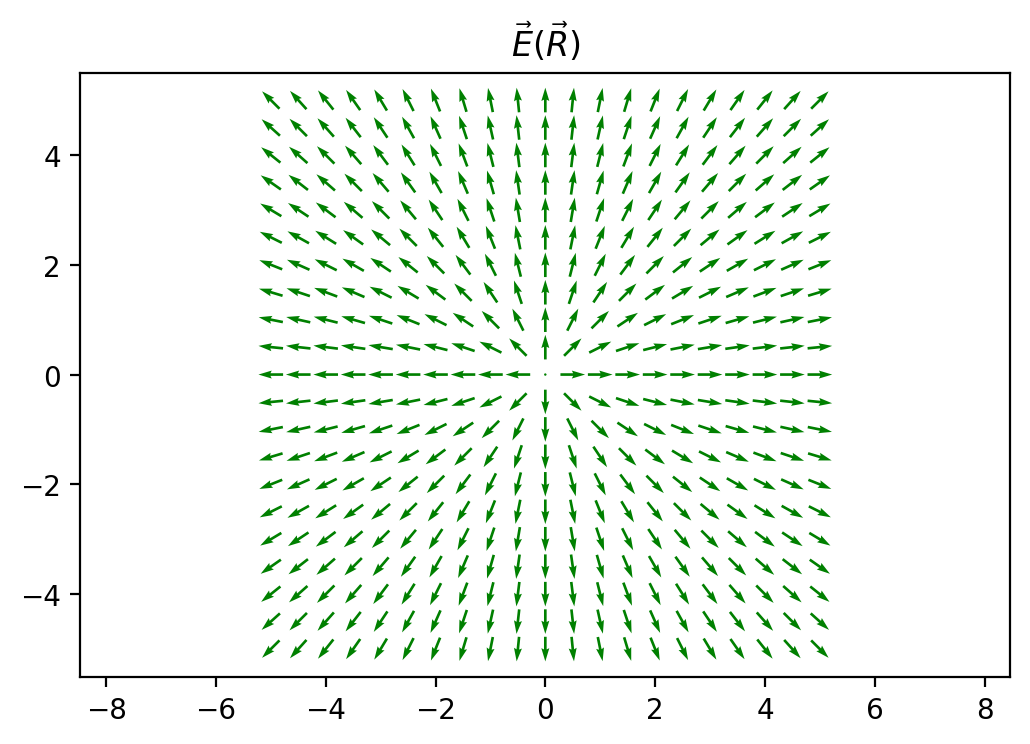

In [8]:
X,Y = coordinates_2d()
Ex,Ey = field_2d()
draw_field_2d(X,Y,Ex,Ey)

## Dipole

Change the values and locations of the charges below.

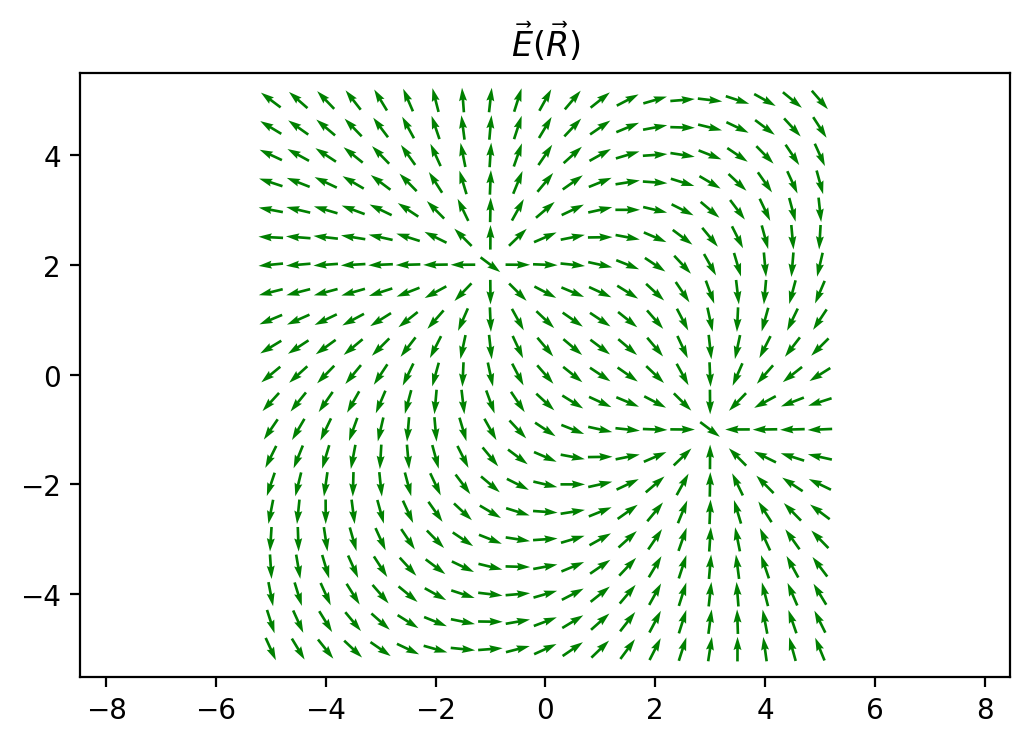

In [9]:
q1 = -3
x1 = +3
y1 = -1

q2 = +3
x2 = -1
y2 = 2

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2)))
draw_field_2d(X,Y,Ex,Ey)

What patterns or trends do you notice when the charges have the same sign?  What happens near the charges?  What happens farther away?

When the charges have the same sign, the field bends in the center of the two charges. It seems to always want to point outwards from the location of the two charges. Further way, the fields point either directly outwards or directly inwards. When you observe the direction of the field from far enough away, it would be difficult to determine whether it came from two charges or a single point charge.

What patterns or trends do you notice when the charges have the opposite sign and different magnitudes?  What happens near the charges?  What happens farther away?

Near the charge with greater magnitude, the field on the side opposite of the other charge begins curling towards the other charge much close than the field from the opposite charge. This shows that the stonger charge has a greater effect on the direction of the field than the weaker one. Near each charge, there is a line parallel to the x and y axes which point directly inwards or outwards from the charge. With weaker charges, this line starts to curl much closer to the charge.

What patterns or trends do you notice when the charges have the opposite sign and equal magnitudes?  What happens near the charges?  What happens farther away?

When the two charges have equal magnitude, the field is symmetrical on both sides of the dipole. That is to say that even though the vectors point in opposite directions, the amount which they curl around the charges stays the same. Between the charges, the field points almost directly from the positive charge to the negative charge. As the field spread out, the vectors begin to curve from the positive to negative charge. On opposite sides of the dipole, the field points almost directly inwards or ourwards. 

## Quadrupole

The field created by two charges of equal magnitude and opposite sign that are very close together is called a ***dipole***.

We can combine two dipoles to make a new kind of patterns.  Try the following.

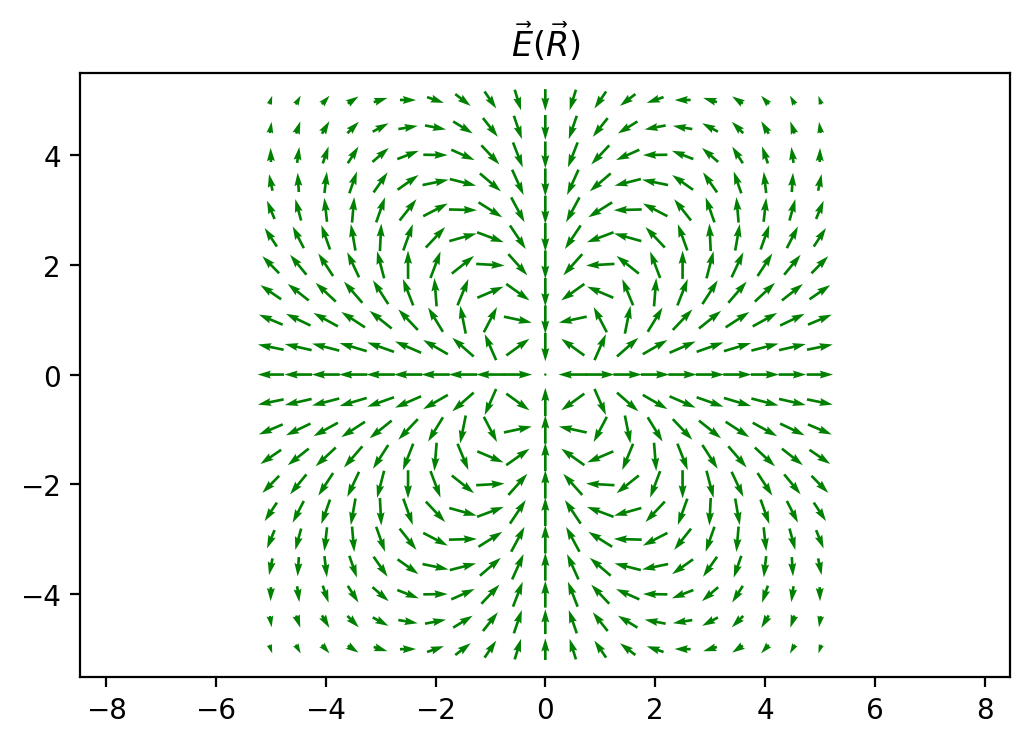

In [10]:
# (A) Two dipoles, pointing directly at each other.
q1 = +1
x1 = +0.5
y1 = 0

q2 = -2.0
x2 = 0
y2 = 0

q3 = +1
x3 = -0.5
y3 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) + np.stack(field_2d(q3, (x3,y3)))
draw_field_2d(X,Y,Ex,Ey)

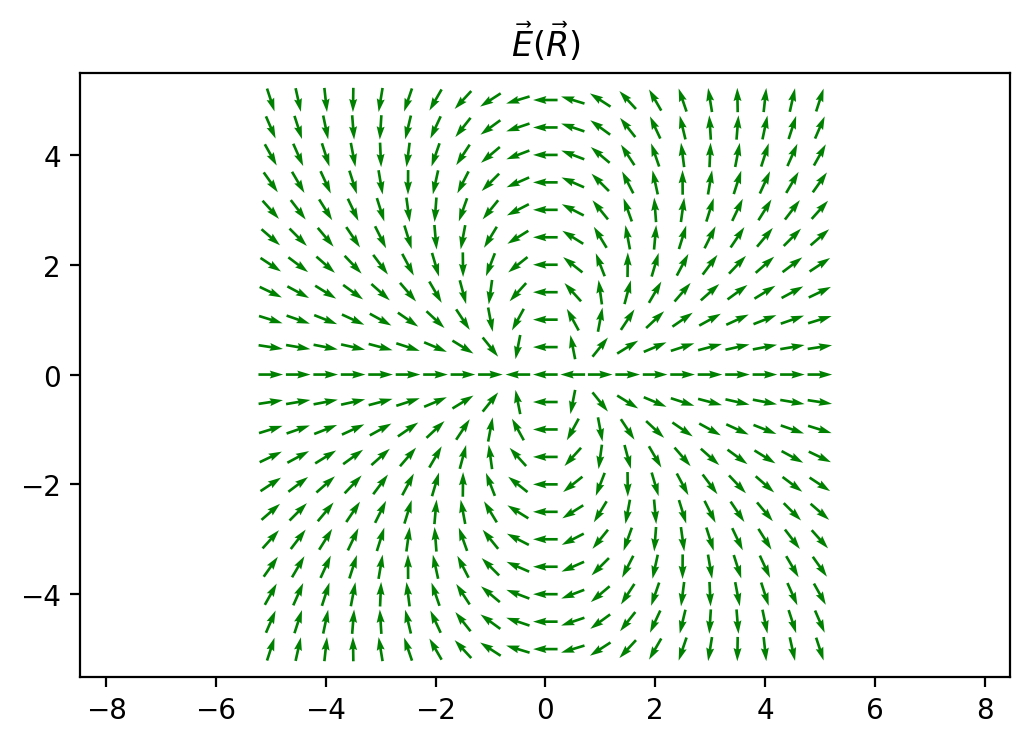

In [11]:
# (B) Two dipoles, end to end.
q1 = +1
x1 = +0.5
y1 = 0

q2 = 0
x2 = 0
y2 = 0

q3 = -1
x3 = -0.5
y3 = 0

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) + np.stack(field_2d(q3, (x3,y3)))
draw_field_2d(X,Y,Ex,Ey)

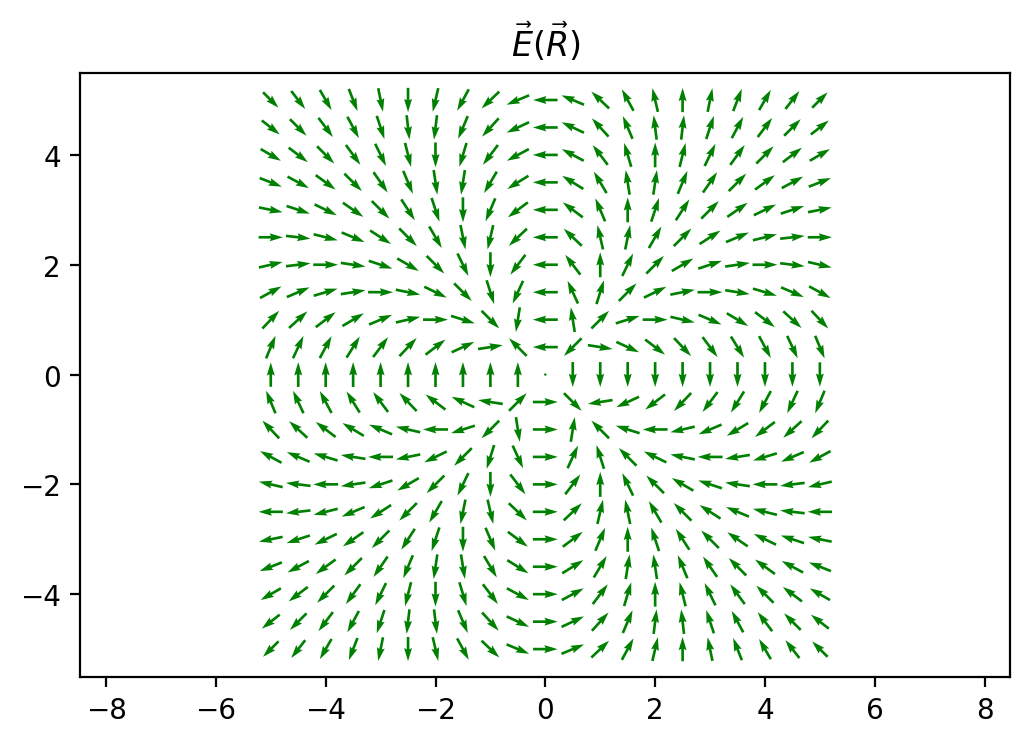

In [12]:
# (C) Two dipoles, pointing in opposite directions, but separated.
q1 = +1
x1 = +0.5
y1 = +0.5

q2 = -1
x2 = +0.5
y2 = -0.5

q3 = -1
x3 = -0.5
y3 = +0.5

q4 = +1
x4 = -0.5
y4 = -0.5

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) \
        + np.stack(field_2d(q3, (x3,y3))) + np.stack(field_2d(q4, (x4,y4)))
draw_field_2d(X,Y,Ex,Ey)

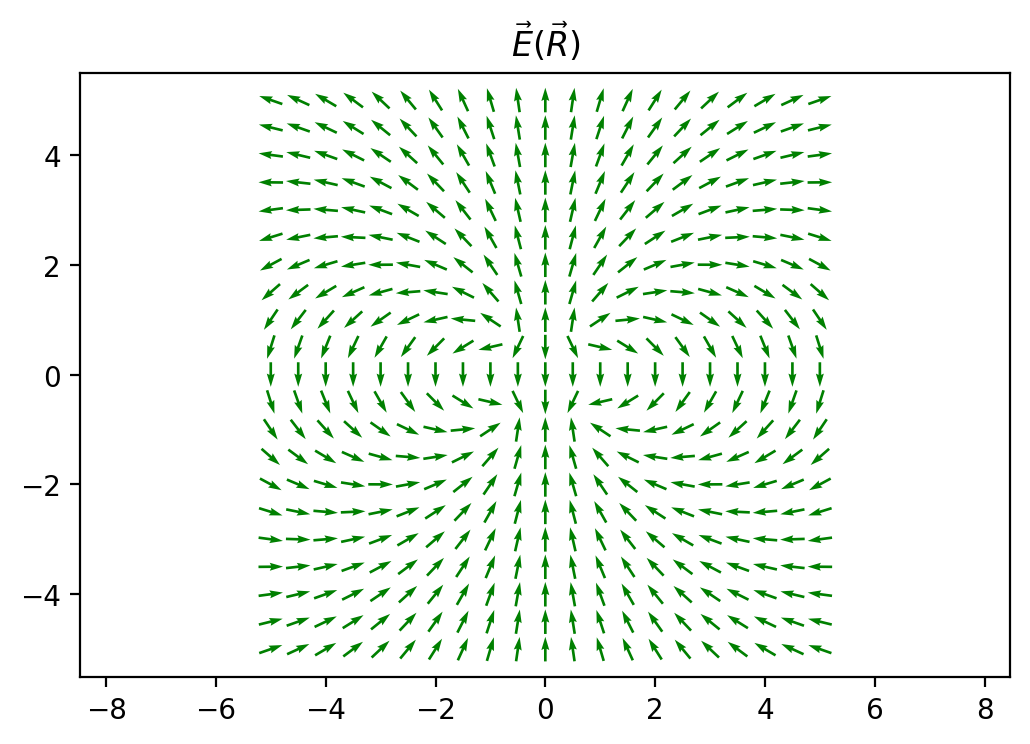

In [13]:
# (C) Two dipoles, pointing in the same direction, but separated.
q1 = +1
x1 = +0.5
y1 = +0.5

q2 = -1
x2 = +0.5
y2 = -0.5

q3 = +1
x3 = -0.5
y3 = +0.5

q4 = -1
x4 = -0.5
y4 = -0.5

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) \
        + np.stack(field_2d(q3, (x3,y3))) + np.stack(field_2d(q4, (x4,y4)))
draw_field_2d(X,Y,Ex,Ey)

Some of these fields are *dipole* fields and some are *quadrupole* fields.  Which are dipole fields?  Which are quadrupole?  How can you tell?  Where do you think the names come from?

When the fields are created from dipoles pointing in different directions, they are quadrupoles. If the direction is the same, they are simply dipole fields with double the charge in the center. For example, in graph 2, the dipoles are touching and as such they create a regular dipole field. The way to tell if a field is a quadropole or dipole from the field is to observe the number of independently curving fields. All the quadropole fields have 4 distinct curving fields, while the dipoles only have 2 curves. By this logic, graphs 2 and 4 are dipole fields and 1 and 3 are quadrupoles. 

# Further Exploration

Try at least one of the following.

## Tripole

We saw monopole, dipole, and quadrupole fields.  Can you create a tripole field?

Copy one of the field plotting cells below and tinker with the charges and locations.

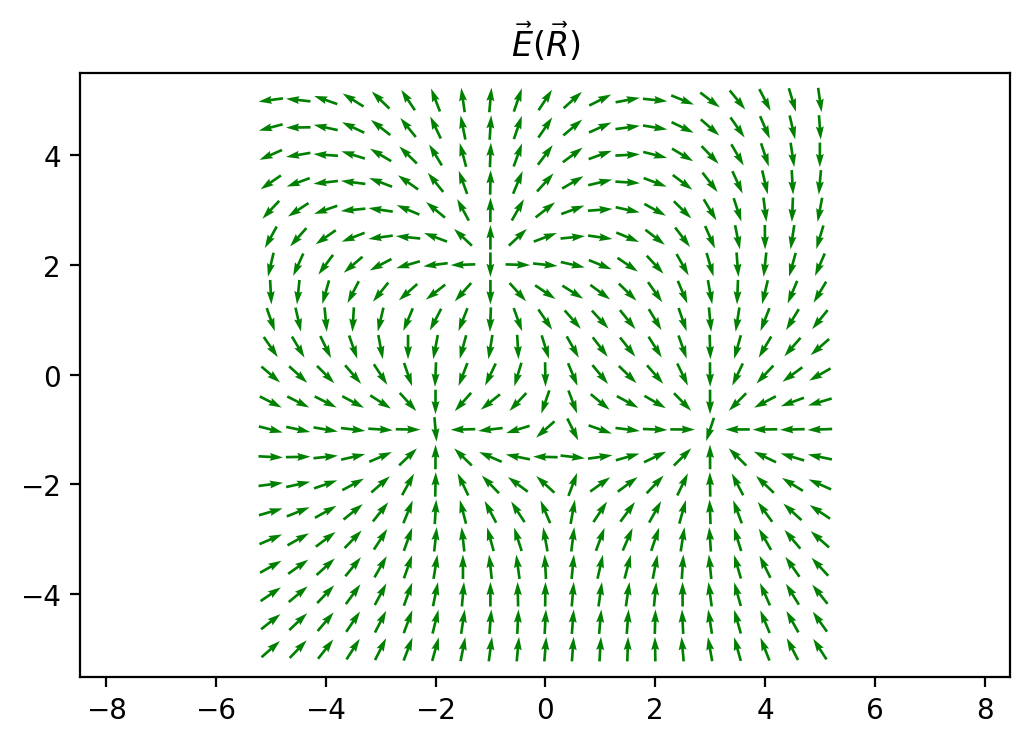

In [14]:
q1 = -1
x1 = +3
y1 = -1

q2 = +1
x2 = -1
y2 = 2

q3 = -1
x3 = -2
y3 = -1

X,Y = coordinates_2d()
Ex, Ey = np.stack(field_2d(q1, (x1,y1))) + np.stack(field_2d(q2, (x2,y2))) + np.stack(field_2d(q3, (x3,y3)))
draw_field_2d(X,Y,Ex,Ey)

What did you find?

By adding an extra charge to the graph from the dipole field, I can create a three charge network. That being said, it isn't really a tripole. From my own definition in the quadrupole section, a tripole should have three curves which are created from the charge. Since there are only two polarities of charge, a tripole is impossible in this configuration. Two of the charges will always create repelling fields, so this configuration will always act like a dipole with a doubly charged side.

## Streamlines

Refer to the streamlines example from the `visualizing-fields` notebook.  Adapt the code there to produce similar plots for (A) a dipole field and (B) a quadrupole field.

Which representation seems most useful to you?  Why?

## Coding Challenge: Slider

There is a thrid notebook in this folder: `slider-example.`  It illustrates how to add a slider to a plot — effectively an interactive animation.

Try to adapt this example to one of the plots you've created this week.  For example, you could ...

- Add a slider to a dipole plot that controls the separation of the charges.
- Add a slider to a heatmap of the potential that controls the z-coordinate of the slice.
- Implement your own idea for something cool!

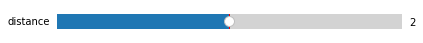

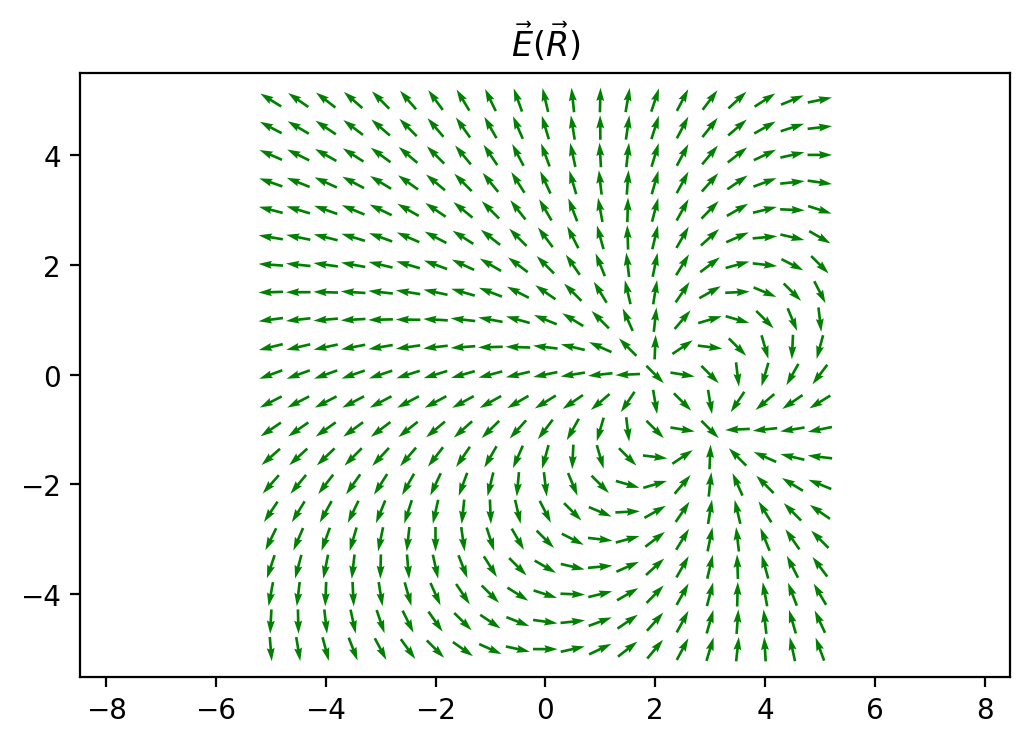

In [20]:
q1 = -3
x1 = +3
y1 = -1

q2 = +3
x2 = 0
y2 = 0

value = 0

fig = plt.figure()

ax2 = fig.add_axes([0.1, 0.85, 0.8, 0.1])
s=Slider(ax = ax2, label = 'distance', valmin = 0, valmax = 4, valinit = 2 )

def update(value):
    value = s.val
    X,Y = coordinates_2d()
    Ex, Ey = np.stack(field_2d(q1, (x1, y1))) + np.stack(field_2d(q2, (x2 + value, y2)))
    draw_field_2d(X,Y,Ex,Ey)
    
s.on_changed(update)
update(0)

plt.show()

In [1]:
#Gave it my best shot but I couldn't get the slider to work. it's just stuck there as a picture